## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
#1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
#2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。使用describe()方法生成数据的描述性统计信息。
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf' 
font_prop = fm.FontProperties(fname=font_path) 
plt.rcParams['font.family'] = font_prop.get_name() 
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

df = pd.read_csv('github_bot_processed_data.csv')

pd.set_option('display.max_rows', 100) # 显示选项
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


print(df.head())
print("*******")
print(df.info()) 
print("*******")
print(df.describe()) # 描述性统计信息


   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot  True       False    False  False      True     False  

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
print(df.head())


   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                created_at                updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00               0
3    Bot  True       False    False  False      True     False          

In [3]:
#4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])


print(df[['public_repos', 'log_public_repos', 'public_gists', 'log_public_gists', 'followers', 'log_followers', 'following', 'log_following']].head())


   public_repos  log_public_repos  public_gists  log_public_gists  followers  log_followers  following  log_following
0            26          3.295837             1          0.693147          5       1.791759          1       0.693147
1            30          3.433987             3          1.386294          9       2.302585          6       1.945910
2           103          4.644391            49          3.912023       1212       7.100852        221       5.402677
3            49          3.912023             0          0.000000         84       4.442651          2       1.098612
4            11          2.484907             1          0.693147          6       1.945910          2       1.098612


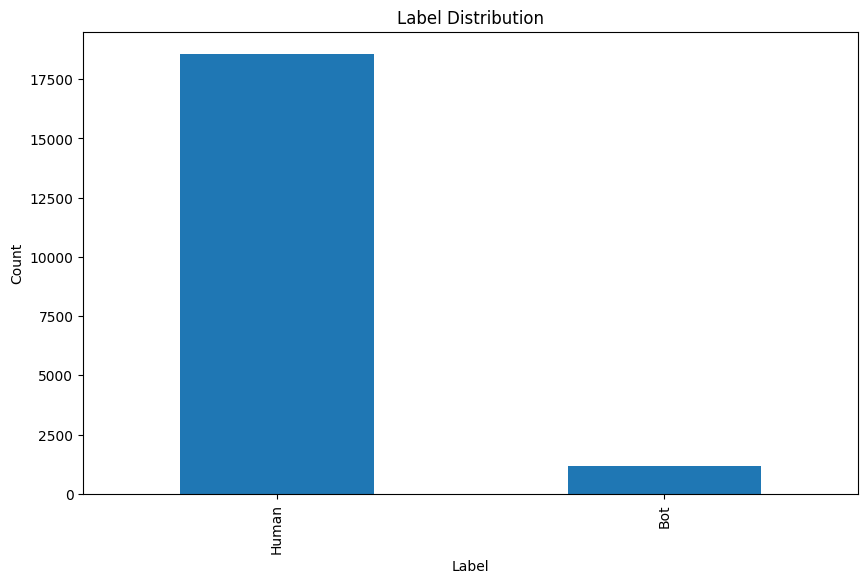

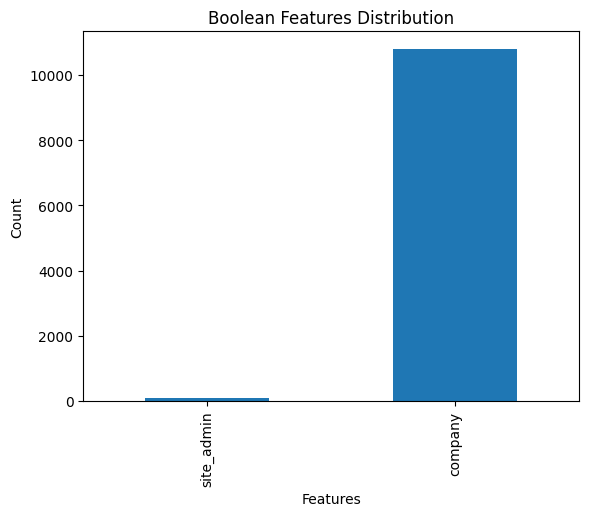

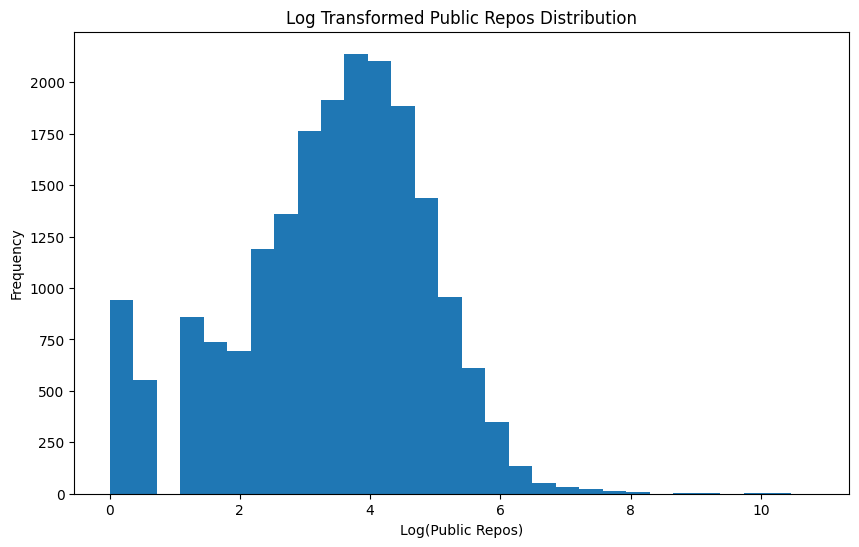

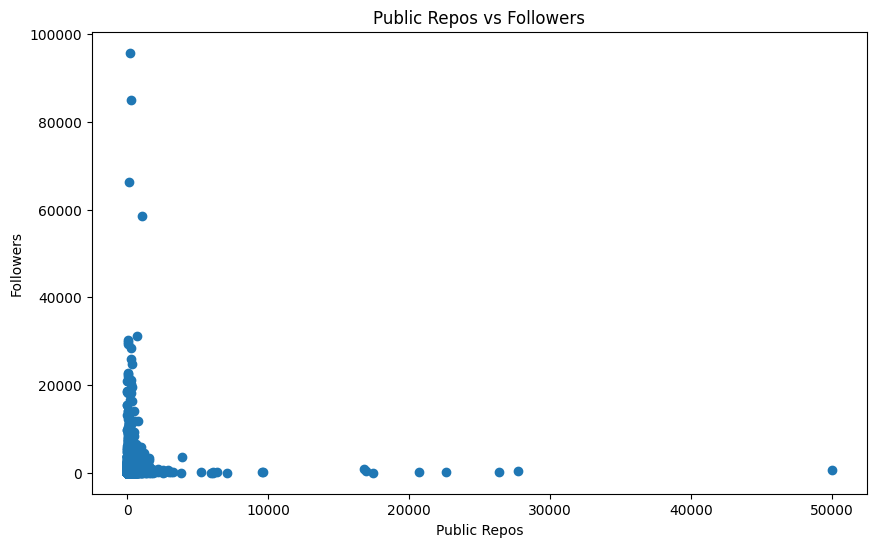

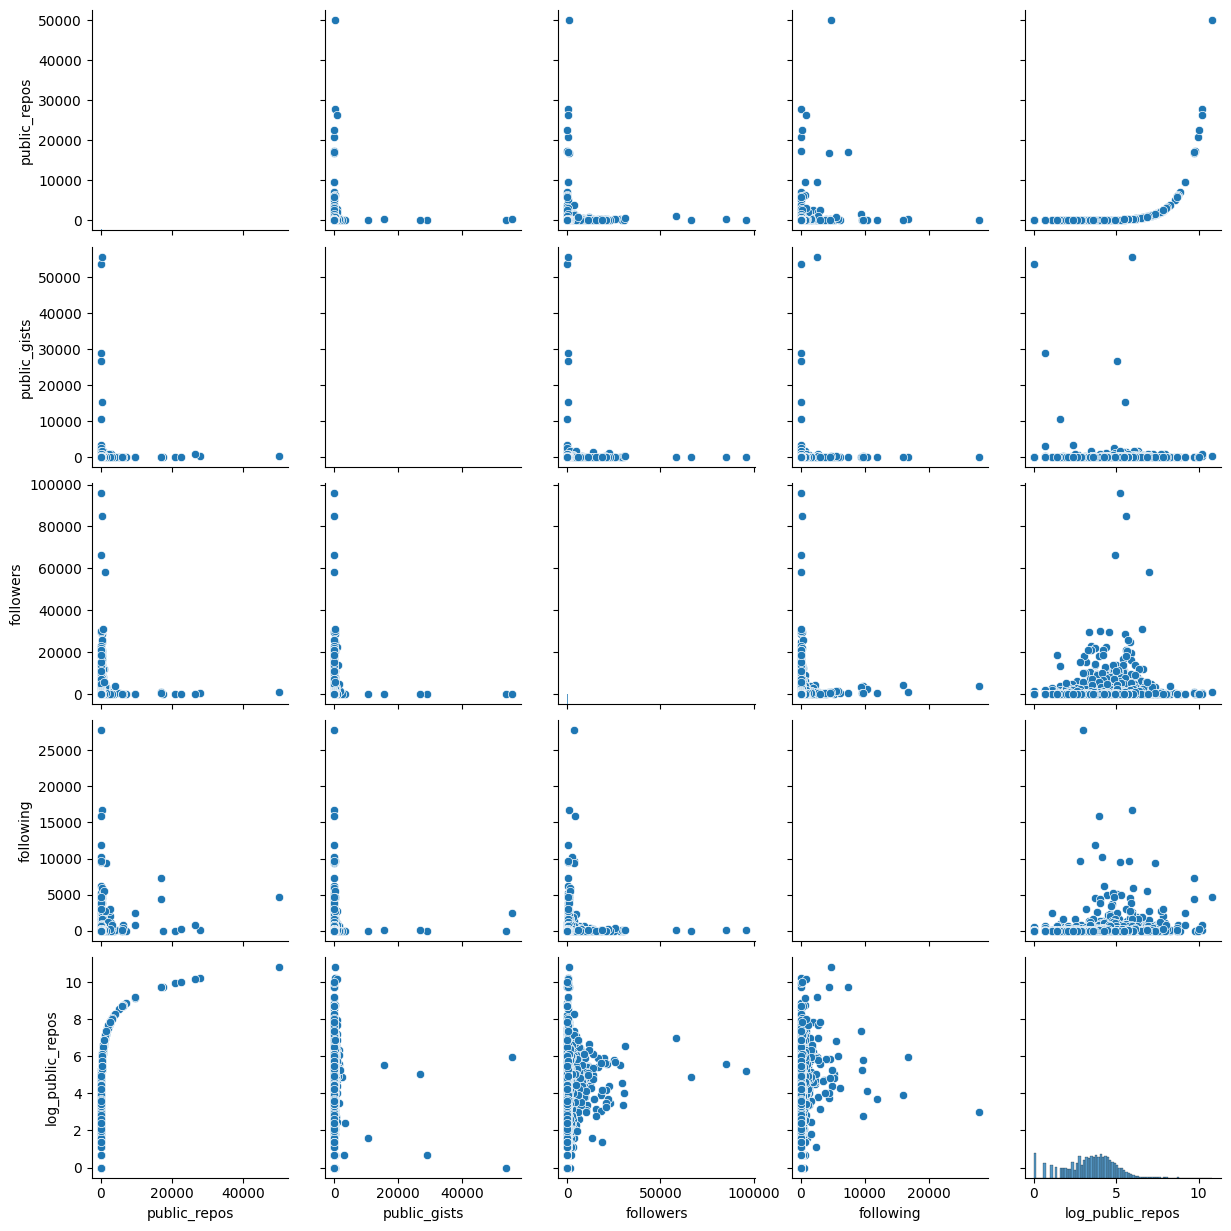

In [4]:
#5. 使用Matplotlib绘制图表

label_counts = df['label'].value_counts()# 绘制条形图
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


boolean_features = ['site_admin', 'company'] # 绘制堆积柱状图
df[boolean_features].astype(int).sum().plot(kind='bar', stacked=True)
plt.title('Boolean Features Distribution')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()



plt.figure(figsize=(10, 6)) # 绘制直方图
df['log_public_repos'].plot(kind='hist', bins=30)
plt.title('Log Transformed Public Repos Distribution')
plt.xlabel('Log(Public Repos)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6)) # 绘制散点图
plt.scatter(df['public_repos'], df['followers']) 
plt.title('Public Repos vs Followers') 
plt.xlabel('Public Repos') 
plt.ylabel('Followers') 
plt.show()


import seaborn as sns# 绘制散点矩阵
numeric_features = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos']
sns.pairplot(df[numeric_features])
plt.show()





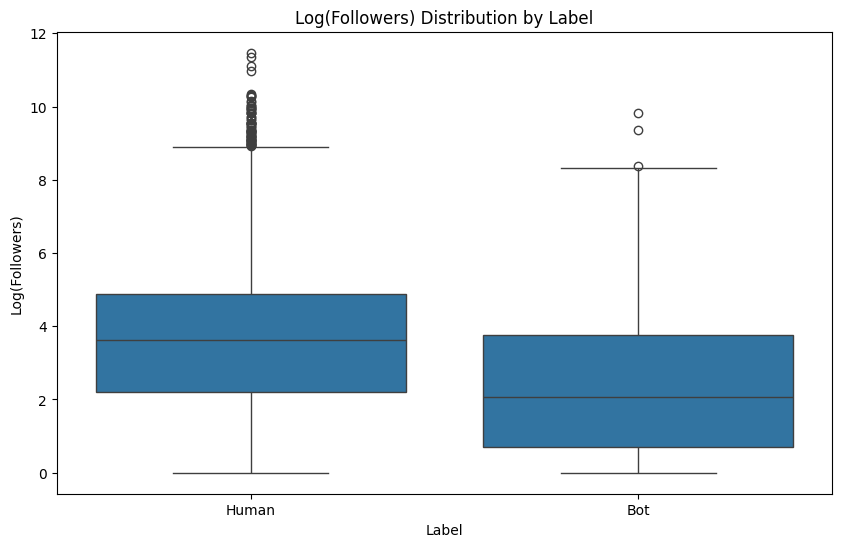

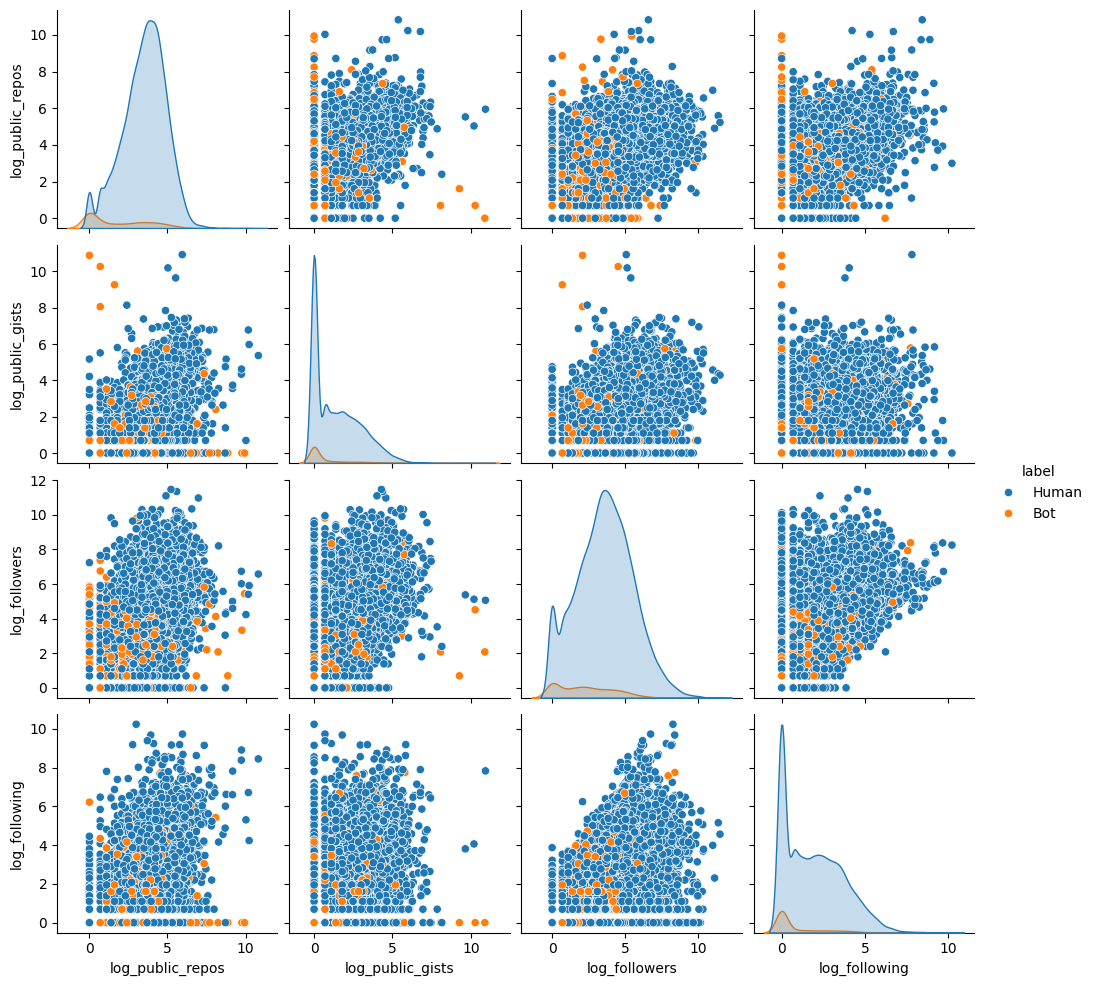

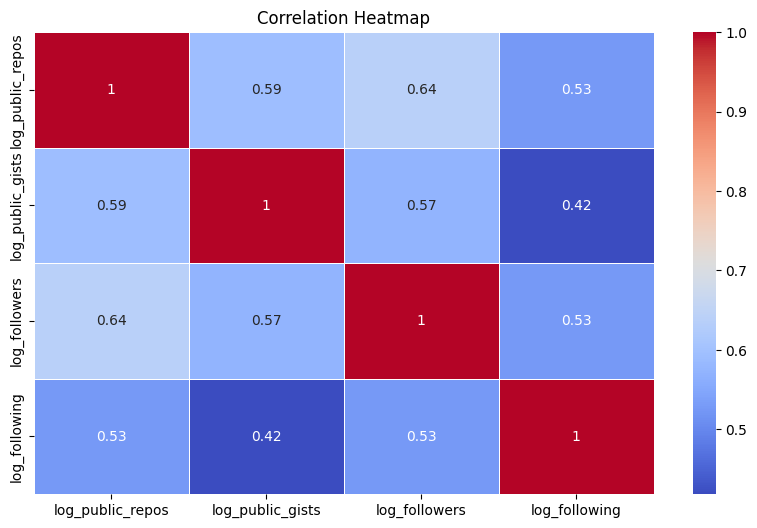

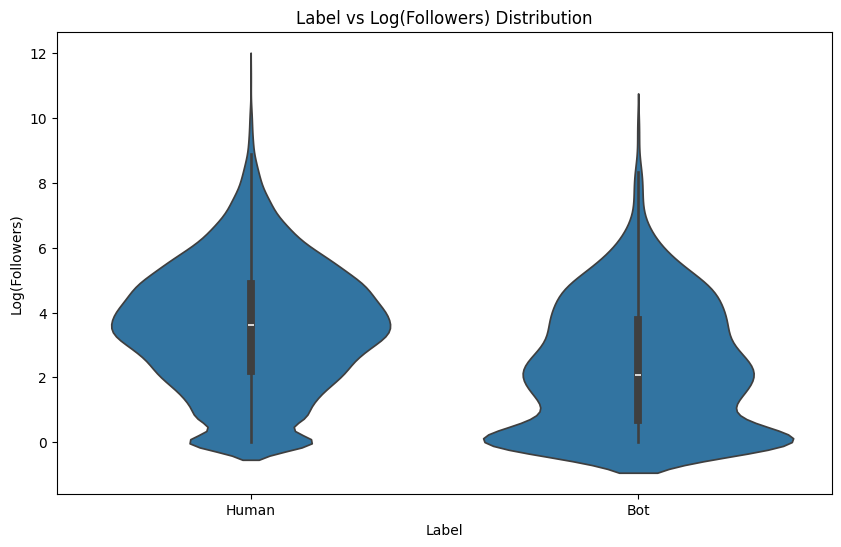

In [5]:
#6.使用Seaborn绘制图表

plt.figure(figsize=(10, 6)) # 绘制箱线图
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Log(Followers) Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()


numeric_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'] # 绘制成对图
sns.pairplot(df, vars=numeric_features, hue='label')
plt.show()


corr_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr() # 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



plt.figure(figsize=(10, 6)) # 绘制小提琴图
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Label vs Log(Followers) Distribution')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()







In [6]:
# 7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。
from ydata_profiling import ProfileReport#我的pandas_profiling有问题，用ydata_profiling代替
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf' 
font_prop = fm.FontProperties(fname=font_path) # 设置 matplotlib 使用 TrueType 字体 
plt.rcParams['font.family'] = font_prop.get_name() 
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

profile = ProfileReport(df, title="GitHub Bot Processed Data Report", explorative=True)
profile.to_notebook_iframe()# 在Jupyter Notebook中直接显示报告
#profile.to_file("github_bot_processed_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]